# Prepare geographic data and plots of NZ faults
### created by Duo Li and Shihao Yuan
### this is used to load geographic and geological data (e.g. Community fault model v1.0 (NZ) and make a plot

In [1]:
# load modules 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pygmt
import pandas as pd
import math

%matplotlib inline

# pygmt.show_versions()

gmt [COMPATIBILITY]: Parameter TIME_LANGUAGE is deprecated. Use GMT_LANGUAGE instead.
Please see https://docs.generic-mapping-tools.org/6.4/changes.html#new-features-in-gmt-5 for more information.
pygmt-session [COMPATIBILITY]: Parameter TIME_LANGUAGE is deprecated. Use GMT_LANGUAGE instead.
Please see https://docs.generic-mapping-tools.org/6.4/changes.html#new-features-in-gmt-5 for more information.
gmt [COMPATIBILITY]: Parameter TIME_LANGUAGE is deprecated. Use GMT_LANGUAGE instead.
Please see https://docs.generic-mapping-tools.org/6.4/changes.html#new-features-in-gmt-5 for more information.
pygmt-session [COMPATIBILITY]: Parameter TIME_LANGUAGE is deprecated. Use GMT_LANGUAGE instead.
Please see https://docs.generic-mapping-tools.org/6.4/changes.html#new-features-in-gmt-5 for more information.
begin [INFORMATION]: Creating a workflow directory /Users/duoli/.gmt/sessions/gmt_session.58662
begin [COMPATIBILITY]: Parameter TIME_LANGUAGE is deprecated. Use GMT_LANGUAGE instead.
Please s

In [ ]:
# import palettable.matplotlib as cmapa
# from palettable.cmocean import sequential as cmapb

# from matplotlib.colors import ListedColormap
# Cmap2 = ListedColormap(cmapb.Deep_14.mpl_colors)
# Cmap2

In [3]:
#savefig.format:    png         # {png, ps, pdf, svg}
#savefig.dpi:       figure      # figure dots per inch or 'figure'
mpl.style.use('seaborn-v0_8-talk') # Lovely plotting style

In [4]:
# download activate fault model https://catalogue.data.govt.nz/dataset/new-zealand-active-fault-model/resource/16e96ab4-9b5b-4932-8f9e-e1bf166117a8 

import geopandas as gpd
import os

rootfolder = '/Users/duoli/Documents/NSHM_SRM/NSHM_SRM_model/'

shapefolder = rootfolder + "NZ_CFM_v1_0_shapefile/"
faultShp = os.path.join(shapefolder,"NZ_CFM_v1_0.shp")

gdf_xyz = gpd.read_file(faultShp,include_fields=["Name", "Dip_pref","SR_pref","Geometry"])

# if you need to plot with geographic coordinates 
gdf = gdf_xyz.to_crs(crs={'init':"EPSG:4326"})
gdf.keys()


/Users/duoli/anaconda3/envs/py39/lib/python3.9/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


Index(['Name', 'Dip_pref', 'SR_pref', 'geometry'], dtype='object')

In [9]:
# select fault name                  

values = ['Wellington Hutt Valley: 1',
          'Wellington Hutt Valley: 2',
          'Wellington Hutt Valley: 3',
          'Wellington Hutt Valley: 4',
          'Wellington Hutt Valley: 5',
          # "Wellington: Tararua 1",
          # "Wellington: Tararua 2",
          # "Wellington: Tararua 3",
          # "Wellington: Pahiatua",
          # "Ohariu South 1",
          # "Ohariu South 2",
          # "Ohariu",
          
          'Aotea - Evans Bay',
         ]
gdf_well3 = gdf_xyz.query('Name in @values')
gdf_well3.to_csv("Hutt_Valley_trace.csv")

# print(gdf_well3)
# gdf_well2 = gdf.query('Name in @values')

In [5]:
# select fault name with a string list as input
def find_fault_string(faultShp,strings):
    '''Find fault segments match 'string' and output sub table containing Fault_ID, Name, Dip_pref, SR_pref and Geometry'''
    gdf_xyz = gpd.read_file(faultShp,include_fields=["Fault_ID","Name", "Dip_pref","SR_pref","Geometry"])
    gdf_out = gpd.GeoDataFrame(columns=gdf_xyz.keys())
    # print(gdf_out)

    for string in strings:
        # print(string)
        # print(gdf_xyz[gdf_xyz['Name'].str.contains(string)])
        gdf_out = pd.concat([gdf_out,gdf_xyz[gdf_xyz['Name'].str.contains(string)]])
    
    return gdf_out

In [6]:
# faultShp = os.path.join("/Users/duoli/Documents/NSHM_SRM/NSHM_SRM_model/NZ_CFM_v1_0_shapefile/","NZ_CFM_v1_0.shp")
# PI = np.pi/180
# gdf_xyz = gpd.read_file(faultShp,include_fields=["Name", "Dip_pref","SR_pref","Geometry"])
# dip = gdf_xyz["Dip_pref"]
# print(dip[1])
# gdf_xyz = gpd.read_file(faultShp)
# print(gdf_xyz.keys())
fault1 = ['Humps','Hope',
          'Hundalee','Stone Jug','Point Kean','Leader','Conway-Charwell',
          'Papatea','Jodan Trust','Upper Kowai','Kekerengu','Needles',
         ]
faultTable = find_fault_string(faultShp,fault1)
print(faultTable)


    Fault_ID                   Name Dip_pref  SR_pref  \
359      633              The Humps       50     0.32   
11       552       Hope: Hope River       70    10.90   
12       547           Hope: Conway       80    15.80   
13       554        Hope: Taramakau       70     4.30   
408      548        Hope: Hanmer NW       70    15.00   
409      551  Hope: Kakapo-2-Hamner       70    17.30   
410      553          Hope: Hurunui       70    17.30   
411      550        Hope: Hanmer SW       70     2.30   
412      549        Hope: Hanmer SE       70    13.50   
413      546          Hope: Seaward       80     4.00   
650      545          Hope: Te Rapa       80     3.00   
647      630               Hundalee       55     1.20   
357      625        Leader: Central       70     0.18   
876      626          Leader: South       55     0.18   
877      624          Leader: North       55     0.18   
360      581                Papatea       60     1.50   
240      578            Kekeren

/var/folders/w1/_6wbwxqn58j2p6t9v4n73wcr0000gn/T/ipykernel_58662/1026914072.py:11: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  gdf_out = pd.concat([gdf_out,gdf_xyz[gdf_xyz['Name'].str.contains(string)]])


In [7]:
# load geologic domain dataset 

domainfile = rootfolder + "/NZ_CFM_v1_0_TectonicDomains/"

domainShp = os.path.join(domainfile,"NZ_CFM_v1_0_TectonicDomains.shp")
gd_dom = gpd.read_file(domainShp)
# gd_dom.keys()

gd_dom["geometry"] = gpd.GeoSeries.to_crs(gd_dom["geometry"],crs="EPSG:4326")

for dom_name in gd_dom["DomainName"][:]:
    print(dom_name,file=open('domain_names.txt', 'a'))


In [8]:
# Focal mechanisms - 2016 Kaikoura
# data from USGS: https://earthquake.usgs.gov/earthquakes/eventpage/us1000778i/region-info

focal_mechanism = dict(strike=219, dip=38, rake=128, magnitude=7.8)
locat = np.asarray([-42.737, 173.054])

lon= np.asarray([])
lat= np.asarray([])

# pygmt.datasets.load_earth_relief()
# grid = pygmt.datasets.load_earth_relief(resolution="10m",region=region_map)
# print(grid.shape)

pygmt.makecpt(
    cmap='topo',
    series='-8000/8000/1000',
    continuous=True
)


In [9]:
# topo_data = '@earth_relief_01m'

# locat_wel = np.asarray([-41.3, 174.75])
# region_map = np.asarray([locat_wel[1]-1.0,locat_wel[1]+1.5,locat_wel[0]-0.5,locat_wel[0]+2.5])
# print(region_map)

# faultShp = os.path.join("/Users/duoli/Documents/NSHM_SRM/NSHM_SRM_model/NZ_CFM_v1_0_shapefile/","NZ_CFM_v1_0.shp")
# gdf = gpd.read_file(faultShp,include_fields=["Name", "Dip_pref","Geometry"])
# gdf["geometry"] = gpd.GeoSeries.to_crs(gdf["geometry"],crs="UTM")


[173.75 176.25 -41.8  -38.8 ]


In [34]:
## plot NZ national wide geographic setting or regional high-resolution data.
topo_data = '@earth_gebco_30s'
locat_kai = np.asarray([-42.737, 173.054])
region_map = np.asarray([locat_kai[1]-3.2,locat_kai[1]+3.2,locat_kai[0]-2.2,locat_kai[0]+2.2])

print(region_map)

[169.854 176.254 -44.937 -40.537]


/var/folders/w1/_6wbwxqn58j2p6t9v4n73wcr0000gn/T/ipykernel_58662/1409298099.py:20: FutureWarning: The 'color' parameter has been deprecated since v0.8.0 and will be removed in v0.12.0. Please use 'fill' instead.
  fig.plot(x=locat_kai[1], y=locat_kai[0], style="c0.2c",color='red') # plot focal mechanism


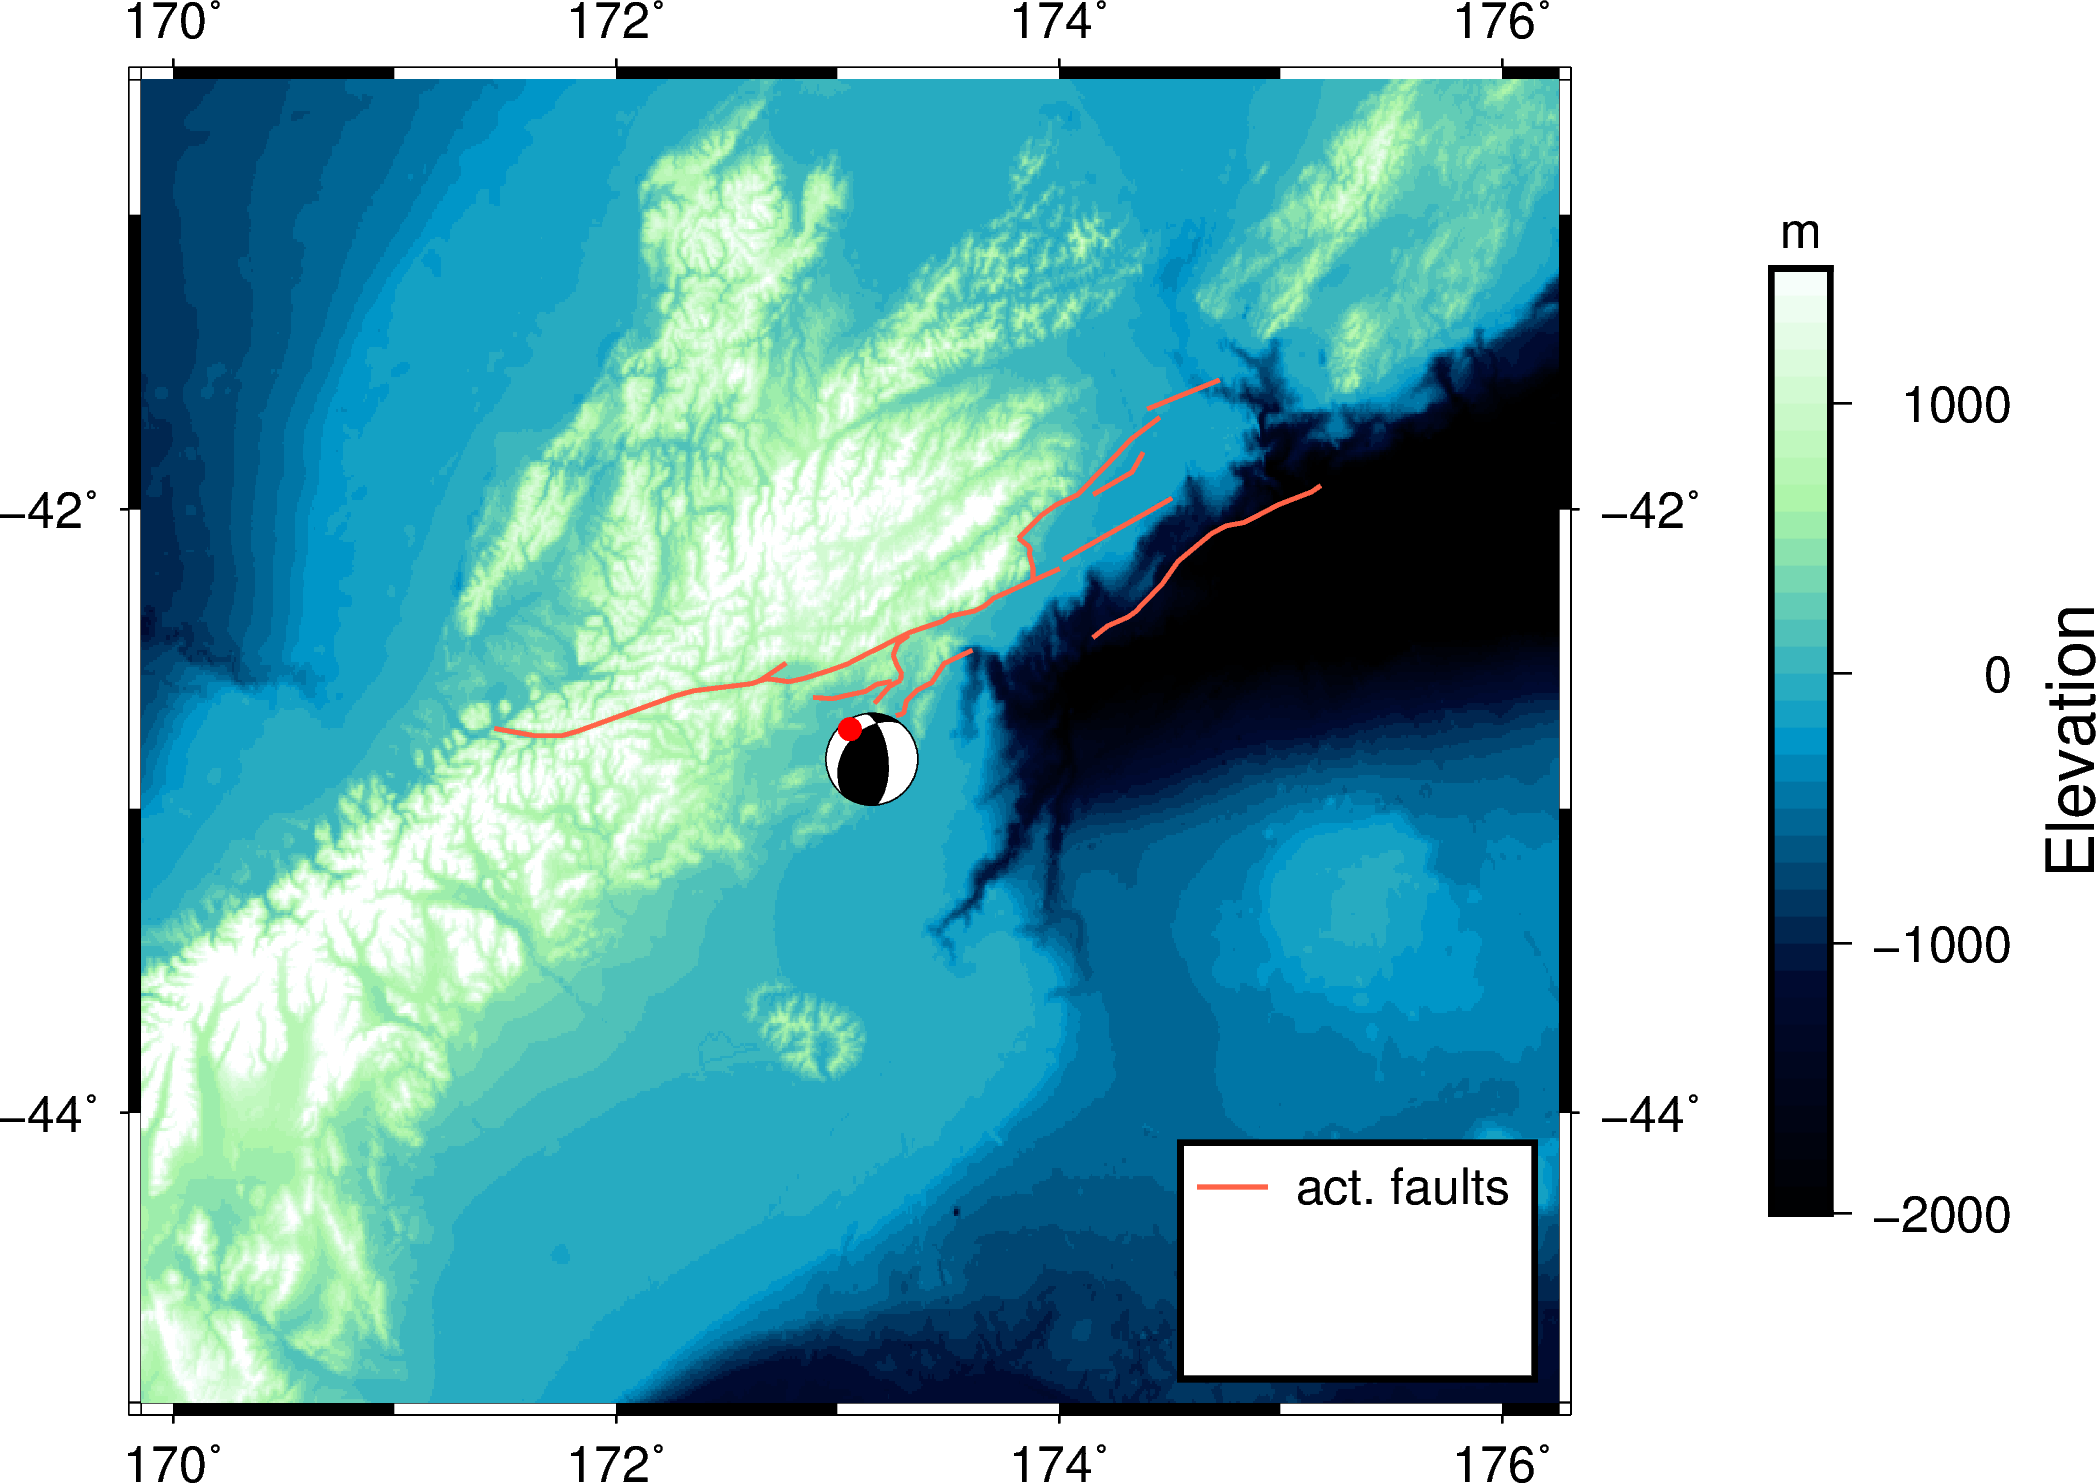

In [35]:
# plot geological map
fig = pygmt.Figure()

fig.basemap(region=region_map, projection="M12c", frame="afg")
fig.coast(land="white", water="skyblue")

# create a discrete colormap based on default Oleron
cmap_oleron = pygmt.makecpt(series=[-2000, 1500, 100], cmap="ocean", continuous=False)
# cmap_try = pygmt.makecpt(series="-500,500,1", cmap="blue,white,red", continuous=True)

fig.grdimage(grid=topo_data, region=region_map,cmap = cmap_oleron)

# contour plot
# fig.grdcontour(grid=topo_data, interval = 100, annotation=1000)

# plot SHP file: active faults and community
# fig.plot(data=gd_dom,pen='0.5p,maroon',label='tect. units')

fig.meca(focal_mechanism, scale="0.5c", longitude=locat[1]+0.1, latitude=locat[0]-0.1, depth=15.1) # plot focal mechanism
fig.plot(x=locat_kai[1], y=locat_kai[0], style="c0.2c",color='red') # plot focal mechanism

fig.plot(data = faultTable,label='act. faults',pen='1.0p,tomato')

fig.legend(position = 'jBR+jMR+o0.2c/1.2c+w3c/2c', box='+gwhite+p1.5p,black')
fig.colorbar(position="JMR+o1.8c/0c+w8c/0.5c+v",frame=["a1000","x+lElevation", "y+lm"]) # position="x12.5c/6.6c+w6c+jTC+v"

fig.show()

outname = '/Users/duoli/Documents/NSHM_SRM/Geometry/' + 'geomap_topo_kai.png'
fig.savefig(outname,dpi=300)

In [ ]:
# fault_set =[]
# fault_set.append(gdf[gdf["Name"]=="Hope: Taramakau"])
# fault_set.append(gdf[gdf["Name"]=="Hope: Hope River"])
# fault_set.append(gdf[gdf["Name"]=="Ohariu"])
# fault_set.append(gdf[gdf["Name"]=="Evans Bay"])

fig1 = pygmt.Figure()

# fig1.plot(data=gdf,pen='0.50p,black')
faultTable["geometry"] = gpd.GeoSeries.to_crs(faultTable["geometry"],crs="EPSG:4326")

fig1.basemap(region=region_map, projection="M9c", frame="af")
fig.coast(land="white", water="skyblue")
fig1.plot(data=faultTable,pen='1.5p,maroon')

# for fault_id in faultTable:
    # print(fault_id)
    # fig1.plot(data=fault_id, color='red')

fig1.show()

outname = "activate-fault-kaikoura.png"
fig1.savefig(outname,dpi=300)

In [ ]:
# fig = pygmt.Figure()

# fig.basemap(region=region_map, projection="M12c", frame="afg",**main_caption)
# fig.coast(land="white", water="skyblue",shorelines='.50p,black')
# # 
# # fig.grdimage(grid=topo_data, region=region_map,cmap='oleron')


# # plot SHP file: active faults and community
# fig.plot(data = gd_dom,pen='0.5p,blue',label='tect. units')
# fig.plot(data = gdf_well3,pen='1.5p,maroon',label='act. faults')

# fig.meca(focal_mechanism, scale="0.5c", longitude=locat[1]+0.3, latitude=locat[0]-0.3, depth=15.1) # plot focal mechanism
# fig.plot(x=locat_wel[1], y=locat_wel[0], style="c0.2c",color='red') # plot focal mechanism

# # # fig.plot(x=lon, y=lat, style="t0.5c", color='red',label='Stations') # plot stations
# # # fig.text(x=lon, y=lat-0.2, text=sta, font=font) # plot station names

# # fig.plot(data = faultShp)

# fig.legend(position = 'jBR+jMR+o0.2c/1.2c+w3c/2c', box='+gwhite+p1.5p,black',**minor_caption)
# # fig.colorbar(position="JMR+o1.3c/0c+w7c/0.5c+v",frame=["a2000","x+lElevation", "y+lm"]) # position="x12.5c/6.6c+w6c+jTC+v"

# fig.show()

# outname = '/Users/duoli/Documents/NSHM_SRM/Geometry/' + 'geomap_WEL.png'
# fig.savefig(outname)